<a href="https://colab.research.google.com/github/JustKeepPlay/PyProject/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## #**LeNet**

LeNet is the most popular CNN architecture in 1998.
Originally developed to categorise handwritten digits from 0–9 of the MNISTDataset. It was made up of 7 layers, each with its own set of trainable parameters. It accepts a 32 × 32 pixel picture, which is rather huge in comparison to the images in the data sets used to train the network .RELU is the activation function that has been used. The layers are laid out in the following order:




In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import io
import PIL
import PIL.Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.losses import  sparse_categorical_crossentropy
from tensorflow.keras.metrics import sparse_categorical_accuracy
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AveragePooling2D

In [ ]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive'

In [ ]:
from google.colab import files
X_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/Arabic Handwritten Digits Dataset/csvTrainImages 60k x 784.csv').values
Y_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/Arabic Handwritten Digits Dataset/csvTrainLabel 60k x 1.csv').values
X_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/Arabic Handwritten Digits Dataset/csvTestImages 10k x 784.csv').values
Y_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/Arabic Handwritten Digits Dataset/csvTestLabel 10k x 1.csv').values

In [ ]:
X_train, X_test = (X_train / 255.0), (X_test / 255.0) # Normalize to [0, 1]

In [ ]:
X_train = X_train.reshape(len(Y_train), 28, 28, 1)
X_test = X_test.reshape(len(Y_test), 28, 28, 1)
X_train.shape

(59999, 28, 28, 1)

In [ ]:
# Building the Model Architecture
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 28 32−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [ ]:
model.compile( optimizer='adam',loss=sparse_categorical_crossentropy,metrics=[sparse_categorical_accuracy],)

In [ ]:
training = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 49s 103ms/step - loss: 0.2166 - sparse_categorical_accuracy: 0.9419 - val_loss: 0.0837 - val_sparse_categorical_accuracy: 0.9746
Epoch 2/20
469/469 [==============================] - 33s 71ms/step - loss: 0.0517 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.0587 - val_sparse_categorical_accuracy: 0.9809
Epoch 3/20
469/469 [==============================] - 27s 59ms/step - loss: 0.0366 - sparse_categorical_accuracy: 0.9891 - val_loss: 0.0469 - val_sparse_categorical_accuracy: 0.9857
Epoch 4/20
469/469 [==============================] - 28s 61ms/step - loss: 0.0282 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.0492 - val_sparse_categorical_accuracy: 0.9843
Epoch 5/20
469/469 [==============================] - 28s 60ms/step - loss: 0.0233 - sparse_categorical_accuracy: 0.9931 - val_loss: 0.0439 - val_sparse_categorical_accuracy: 0.9862
Epoch 6/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0203 - spar

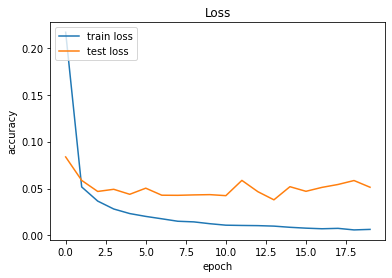

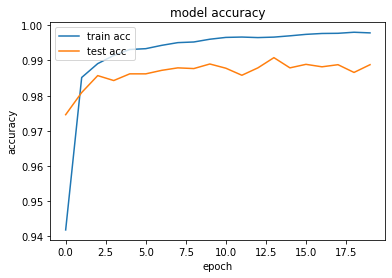

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper left')
plt.show()

plt.plot(training.history['sparse_categorical_accuracy'])
plt.plot(training.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc'], loc = 'upper left')
plt.show()